In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
#Reading csv file
leadsData = pd.read_csv("leads.csv")

In [4]:
# setting up display options of pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# dropping index columns of data i.e lead number and person Id
leadsData.drop(['Prospect ID'], axis = 1, inplace = True)
leadsData.drop(['Lead Number'], axis = 1, inplace = True)

In [6]:
# drop the columns with no variation 
leadsData.drop(['Update me on Supply Chain Content'], axis = 1, inplace = True)
leadsData.drop(['Get updates on DM Content'], axis = 1, inplace = True)

In [7]:
# making a map function for binary columns
def binary_map(x):
    return x.map({"No": 0, "Yes": 1})

leadsData['Do Not Email'] = leadsData['Do Not Email'].to_frame().apply(binary_map)
leadsData['Do Not Call'] = leadsData['Do Not Call'].to_frame().apply(binary_map)
leadsData['Search'] = leadsData['Search'].to_frame().apply(binary_map)
leadsData['Magazine'] = leadsData['Magazine'].to_frame().apply(binary_map)
leadsData['Newspaper Article'] = leadsData['Newspaper Article'].to_frame().apply(binary_map)
leadsData['X Education Forums'] = leadsData['X Education Forums'].to_frame().apply(binary_map)
leadsData['Newspaper'] = leadsData['Newspaper'].to_frame().apply(binary_map)
leadsData['Digital Advertisement'] = leadsData['Digital Advertisement'].to_frame().apply(binary_map)
leadsData['Through Recommendations'] = leadsData['Through Recommendations'].to_frame().apply(binary_map)
leadsData['Receive More Updates About Our Courses'] = leadsData['Receive More Updates About Our Courses'].to_frame().apply(binary_map)

leadsData['I agree to pay the amount through cheque'] = leadsData['I agree to pay the amount through cheque'].to_frame().apply(binary_map)
leadsData['A free copy of Mastering The Interview'] = leadsData['A free copy of Mastering The Interview'].to_frame().apply(binary_map)


In [8]:
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation                  6550 n

In [9]:
leadsData.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,14.306252,16.344883,0.0,0.312554
std,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,1.386694,1.811395,0.0,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,11.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,15.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,16.000000,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000,18.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,18.000000,20.000000,0.0,1.000000


# Analysing variation in columns for converted Variable
Keeping track of categories for which variation is low in converted variable

In [10]:
leadsData[['Lead Origin','Converted']].groupby('Lead Origin').describe()

Converted                                             
                            count      mean       std  min  25%  50%  75%  max
Lead Origin                                                                   
API                        3580.0  0.311453  0.463152  0.0  0.0  0.0  1.0  1.0
Landing Page Submission    4886.0  0.361850  0.480585  0.0  0.0  0.0  1.0  1.0
Lead Add Form               718.0  0.924791  0.263912  0.0  1.0  1.0  1.0  1.0
Lead Import                  55.0  0.236364  0.428764  0.0  0.0  0.0  0.0  1.0
Quick Add Form                1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0

In [11]:
relevantColumns=['Lead Origin_Lead Add Form','Lead Origin_Lead Import']
leadsData[['Lead Source','Converted']].groupby('Lead Source').describe()

Converted                                               
                      count      mean       std  min   25%  50%   75%  max
Lead Source                                                               
Click2call              4.0  0.750000  0.500000  0.0  0.75  1.0  1.00  1.0
Direct Traffic       2543.0  0.321667  0.467208  0.0  0.00  0.0  1.00  1.0
Facebook               55.0  0.236364  0.428764  0.0  0.00  0.0  0.00  1.0
Google               2868.0  0.399930  0.489969  0.0  0.00  0.0  1.00  1.0
Live Chat               2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
NC_EDM                  1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Olark Chat           1755.0  0.255271  0.436138  0.0  0.00  0.0  1.00  1.0
Organic Search       1154.0  0.377816  0.485052  0.0  0.00  0.0  1.00  1.0
Pay per Click Ads       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Press_Release           2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Reference             534.0  0.917603  0.275226  0.0  1.00  1.0  1.00  1.0
Referral Sites        125.0  0.248000  0.433590  0.0  0.00  0.0  0.00  1.0
Social Media            2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
WeLearn                 1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Welingak Website      142.0  0.985915  0.118257  0.0  1.00  1.0  1.00  1.0
bing                    6.0  0.166667  0.408248  0.0  0.00  0.0  0.00  1.0
blog                    1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
google                  5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
testone                 1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
welearnblog_Home        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
youtubechannel          1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0

In [12]:
relevantColumns.extend(['Lead Source_Facebook','Lead Source_Olark Chat','Lead Source_Referral Sites','Lead Source_Reference','Lead Source_Welingak Website'])
leadsData[['Last Activity','Converted']].groupby('Last Activity').describe()

Converted                                              
                                 count      mean       std  min   25%  50%  75%  max
Last Activity                                                                       
Approached upfront                 9.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
Converted to Lead                428.0  0.126168  0.332427  0.0  0.00  0.0  0.0  1.0
Email Bounced                    326.0  0.079755  0.271329  0.0  0.00  0.0  0.0  1.0
Email Link Clicked               267.0  0.273408  0.446546  0.0  0.00  0.0  1.0  1.0
Email Marked Spam                  2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
Email Opened                    3437.0  0.364562  0.481377  0.0  0.00  0.0  1.0  1.0
Email Received                     2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
Form Submitted on Website        116.0  0.241379  0.429776  0.0  0.00  0.0  0.0  1.0
Had a Phone Conversation          30.0  0.733333  0.449776  0.0  0.25  1.0  1.0  1.0
Olark Chat Conversation          973.0  0.086331  0.280997  0.0  0.00  0.0  0.0  1.0
Page Visited on Website          640.0  0.235937  0.424915  0.0  0.00  0.0  0.0  1.0
Resubscribed to emails             1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0
SMS Sent                        2745.0  0.629144  0.483122  0.0  0.00  1.0  1.0  1.0
Unreachable                       93.0  0.333333  0.473960  0.0  0.00  0.0  1.0  1.0
Unsubscribed                      61.0  0.262295  0.443533  0.0  0.00  0.0  1.0  1.0
View in browser link Clicked       6.0  0.166667  0.408248  0.0  0.00  0.0  0.0  1.0
Visited Booth in Tradeshow         1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0

In [13]:
relevantColumns.extend(['Last Activity_Converted to Lead','Last Activity_Email Bounced','Last Activity_Form Submitted on Website',
                        'Last Activity_Olark Chat Conversation','Last Activity_Page Visited on Website',
                        'Last Activity_Unreachable','Last Activity_Unsubscribed'])
leadsData[['Country','Converted']].groupby('Country').describe()

Converted                                               
                         count      mean       std  min   25%  50%   75%  max
Country                                                                      
Asia/Pacific Region        2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Australia                 13.0  0.230769  0.438529  0.0  0.00  0.0  0.00  1.0
Bahrain                    7.0  0.571429  0.534522  0.0  0.00  1.0  1.00  1.0
Bangladesh                 2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Belgium                    2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Canada                     4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
China                      2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Denmark                    1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
France                     6.0  0.500000  0.547723  0.0  0.00  0.5  1.00  1.0
Germany                    4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0
Ghana                      2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Hong Kong                  7.0  0.571429  0.534522  0.0  0.00  1.0  1.00  1.0
India                   6492.0  0.369840  0.482798  0.0  0.00  0.0  1.00  1.0
Indonesia                  1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Italy                      2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Kenya                      1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Kuwait                     4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Liberia                    1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Malaysia                   1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Netherlands                2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Nigeria                    4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Oman                       6.0  0.500000  0.547723  0.0  0.00  0.5  1.00  1.0
Philippines                2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Qatar                     10.0  0.100000  0.316228  0.0  0.00  0.0  0.00  1.0
Russia                     1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Saudi Arabia              21.0  0.190476  0.402374  0.0  0.00  0.0  0.00  1.0
Singapore                 24.0  0.458333  0.508977  0.0  0.00  0.0  1.00  1.0
South Africa               4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0
Sri Lanka                  1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Sweden                     3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0
Switzerland                1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Tanzania                   1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Uganda                     2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
United Arab Emirates      53.0  0.377358  0.489364  0.0  0.00  0.0  1.00  1.0
United Kingdom            15.0  0.333333  0.487950  0.0  0.00  0.0  1.00  1.0
United States             69.0  0.260870  0.442326  0.0  0.00  0.0  1.00  1.0
Vietnam                    1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
unknown                    5.0  0.200000  0.447214  0.0  0.00  0.0  0.00  1.0

In [14]:
leadsData[['Specialization','Converted']].groupby('Specialization').describe()

Converted                                             
                                      count      mean       std  min  25%  50%  75%  max
Specialization                                                                          
Banking, Investment And Insurance     338.0  0.494083  0.500706  0.0  0.0  0.0  1.0  1.0
Business Administration               403.0  0.444169  0.497491  0.0  0.0  0.0  1.0  1.0
E-Business                             57.0  0.368421  0.486664  0.0  0.0  0.0  1.0  1.0
E-COMMERCE                            112.0  0.357143  0.481311  0.0  0.0  0.0  1.0  1.0
Finance Management                    976.0  0.446721  0.497408  0.0  0.0  0.0  1.0  1.0
Healthcare Management                 159.0  0.496855  0.501570  0.0  0.0  0.0  1.0  1.0
Hospitality Management                114.0  0.421053  0.495908  0.0  0.0  0.0  1.0  1.0
Human Resource Management             848.0  0.457547  0.498489  0.0  0.0  0.0  1.0  1.0
IT Projects Management                366.0  0.382514  0.486666  0.0  0.0  0.0  1.0  1.0
International Business                178.0  0.359551  0.481222  0.0  0.0  0.0  1.0  1.0
Marketing Management                  838.0  0.486874  0.500126  0.0  0.0  0.0  1.0  1.0
Media and Advertising                 203.0  0.418719  0.494569  0.0  0.0  0.0  1.0  1.0
Operations Management                 503.0  0.473161  0.499776  0.0  0.0  0.0  1.0  1.0
Retail Management                     100.0  0.340000  0.476095  0.0  0.0  0.0  1.0  1.0
Rural and Agribusiness                 73.0  0.424658  0.497712  0.0  0.0  0.0  1.0  1.0
Select                               1942.0  0.421215  0.493881  0.0  0.0  0.0  1.0  1.0
Services Excellence                    40.0  0.275000  0.452203  0.0  0.0  0.0  1.0  1.0
Supply Chain Management               349.0  0.432665  0.496157  0.0  0.0  0.0  1.0  1.0
Travel and Tourism                    203.0  0.354680  0.479599  0.0  0.0  0.0  1.0  1.0

In [15]:
leadsData[['How did you hear about X Education','Converted']].groupby('How did you hear about X Education').describe()

Converted                                             
                                       count      mean       std  min  25%  50%  75%  max
How did you hear about X Education                                                       
Advertisements                          70.0  0.457143  0.501757  0.0  0.0  0.0  1.0  1.0
Email                                   26.0  0.500000  0.509902  0.0  0.0  0.5  1.0  1.0
Multiple Sources                       152.0  0.368421  0.483971  0.0  0.0  0.0  1.0  1.0
Online Search                          808.0  0.424505  0.494574  0.0  0.0  0.0  1.0  1.0
Other                                  186.0  0.403226  0.491869  0.0  0.0  0.0  1.0  1.0
SMS                                     23.0  0.217391  0.421741  0.0  0.0  0.0  0.0  1.0
Select                                5043.0  0.482054  0.499727  0.0  0.0  0.0  1.0  1.0
Social Media                            67.0  0.417910  0.496938  0.0  0.0  0.0  1.0  1.0
Student of SomeSchool                  310.0  0.461290  0.499305  0.0  0.0  0.0  1.0  1.0
Word Of Mouth                          348.0  0.436782  0.496701  0.0  0.0  0.0  1.0  1.0

In [16]:
leadsData[['What is your current occupation','Converted']].groupby('What is your current occupation').describe()

Converted                                             
                                    count      mean       std  min  25%  50%  75%  max
What is your current occupation                                                       
Businessman                           8.0  0.625000  0.517549  0.0  0.0  1.0  1.0  1.0
Housewife                            10.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Other                                16.0  0.625000  0.500000  0.0  0.0  1.0  1.0  1.0
Student                             210.0  0.371429  0.484341  0.0  0.0  0.0  1.0  1.0
Unemployed                         5600.0  0.435893  0.495918  0.0  0.0  0.0  1.0  1.0
Working Professional                706.0  0.916431  0.276937  0.0  1.0  1.0  1.0  1.0

In [17]:
relevantColumns.extend(['What is your current occupation_Working Professional'])

leadsData[['What matters most to you in choosing a course','Converted']].groupby('What matters most to you in choosing a course').describe()

Converted                                               
                                                  count      mean       std  min   25%  50%   75%  max
What matters most to you in choosing a course                                                         
Better Career Prospects                          6528.0  0.488664  0.499910  0.0  0.00  0.0  1.00  1.0
Flexibility & Convenience                           2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Other                                               1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0

In [18]:
leadsData[['Tags','Converted']].groupby('Tags').describe()

Converted                                               
                                                      count      mean       std  min   25%  50%   75%  max
Tags                                                                                                      
Already a student                                     465.0  0.006452  0.080149  0.0  0.00  0.0  0.00  1.0
Busy                                                  186.0  0.564516  0.497158  0.0  0.00  1.0  1.00  1.0
Closed by Horizzon                                    358.0  0.994413  0.074639  0.0  1.00  1.0  1.00  1.0
Diploma holder (Not Eligible)                          63.0  0.015873  0.125988  0.0  0.00  0.0  0.00  1.0
Graduation in progress                                111.0  0.063063  0.244179  0.0  0.00  0.0  0.00  1.0
In confusion whether part time or DLP                   5.0  0.200000  0.447214  0.0  0.00  0.0  0.00  1.0
Interested  in full time MBA                          117.0  0.025641  0.158742  0.0  0.00  0.0  0.00  1.0
Interested in Next batch                                5.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
Interested in other courses                           513.0  0.025341  0.157312  0.0  0.00  0.0  0.00  1.0
Lateral student                                         3.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
Lost to EINS                                          175.0  0.977143  0.149877  0.0  1.00  1.0  1.00  1.0
Lost to Others                                          7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Not doing further education                           145.0  0.006897  0.083045  0.0  0.00  0.0  0.00  1.0
Recognition issue (DEC approval)                        1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Ringing                                              1203.0  0.028263  0.165791  0.0  0.00  0.0  0.00  1.0
Shall take in the next coming month                     2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Still Thinking                                          6.0  0.166667  0.408248  0.0  0.00  0.0  0.00  1.0
University not recognized                               2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Want to take admission but has financial problems       6.0  0.333333  0.516398  0.0  0.00  0.0  0.75  1.0
Will revert after reading the email                  2072.0  0.968629  0.174359  0.0  1.00  1.0  1.00  1.0
in touch with EINS                                     12.0  0.250000  0.452267  0.0  0.00  0.0  0.25  1.0
invalid number                                         83.0  0.012048  0.109764  0.0  0.00  0.0  0.00  1.0
number not provided                                    27.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
opp hangup                                             33.0  0.090909  0.291937  0.0  0.00  0.0  0.00  1.0
switched off                                          240.0  0.016667  0.128287  0.0  0.00  0.0  0.00  1.0
wrong number given                                     47.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0

In [19]:
relevantColumns.extend(['Tags_Already a student','Tags_Closed by Horizzon','Tags_Diploma holder (Not Eligible)',
                        'Tags_Graduation in progress','Tags_Interested in other courses',
                        'Tags_Lost to EINS','Tags_Not doing further education','Tags_Ringing',
                       'Tags_Will revert after reading the email','Tags_invalid number','Tags_opp hangup','Tags_switched off'])

leadsData[['Lead Quality','Converted']].groupby('Lead Quality').describe()

Converted                                             
                      count      mean       std  min  25%  50%  75%  max
Lead Quality                                                            
High in Relevance     637.0  0.946625  0.224957  0.0  1.0  1.0  1.0  1.0
Low in Relevance      583.0  0.818182  0.386026  0.0  1.0  1.0  1.0  1.0
Might be             1560.0  0.755769  0.429768  0.0  1.0  1.0  1.0  1.0
Not Sure             1092.0  0.243590  0.429445  0.0  0.0  0.0  0.0  1.0
Worst                 601.0  0.019967  0.140002  0.0  0.0  0.0  0.0  1.0

In [20]:
relevantColumns.extend(['Lead Quality_High in Relevance','Lead Quality_Low in Relevance','Lead Quality_Might be'
                        ,'Lead Quality_Not Sure','Lead Quality_Worst'])
leadsData[['Lead Profile','Converted']].groupby('Lead Profile').describe()

Converted                                             
                                count      mean       std  min  25%  50%  75%  max
Lead Profile                                                                      
Dual Specialization Student      20.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Lateral Student                  24.0  0.958333  0.204124  0.0  1.0  1.0  1.0  1.0
Other Leads                     487.0  0.369610  0.483195  0.0  0.0  0.0  1.0  1.0
Potential Lead                 1613.0  0.785493  0.410607  0.0  1.0  1.0  1.0  1.0
Select                         4146.0  0.408104  0.491542  0.0  0.0  0.0  1.0  1.0
Student of SomeSchool           241.0  0.037344  0.189999  0.0  0.0  0.0  0.0  1.0

In [21]:
relevantColumns.extend(['Lead Profile_Lateral Student','Lead Profile_Potential Lead','Lead Profile_Student of SomeSchool'])
leadsData[['City','Converted']].groupby('City').describe()

Converted                                             
                                count      mean       std  min  25%  50%  75%  max
City                                                                              
Mumbai                         3222.0  0.406269  0.491212  0.0  0.0  0.0  1.0  1.0
Other Cities                    686.0  0.402332  0.490726  0.0  0.0  0.0  1.0  1.0
Other Cities of Maharashtra     457.0  0.439825  0.496910  0.0  0.0  0.0  1.0  1.0
Other Metro Cities              380.0  0.407895  0.492091  0.0  0.0  0.0  1.0  1.0
Select                         2249.0  0.490440  0.500020  0.0  0.0  0.0  1.0  1.0
Thane & Outskirts               752.0  0.449468  0.497771  0.0  0.0  0.0  1.0  1.0
Tier II Cities                   74.0  0.337838  0.476201  0.0  0.0  0.0  1.0  1.0

In [22]:
leadsData[['Asymmetrique Activity Index','Converted']].groupby('Asymmetrique Activity Index').describe()

Converted                                             
                                count      mean       std  min  25%  50%  75%  max
Asymmetrique Activity Index                                                       
01.High                         821.0  0.298417  0.457842  0.0  0.0  0.0  1.0  1.0
02.Medium                      3839.0  0.424590  0.494345  0.0  0.0  0.0  1.0  1.0
03.Low                          362.0  0.091160  0.288235  0.0  0.0  0.0  0.0  1.0

In [23]:
relevantColumns.extend(['Asymmetrique Activity Index_01.High','Asymmetrique Activity Index_03.Low'])
leadsData[['Asymmetrique Profile Index','Converted']].groupby('Asymmetrique Profile Index').describe()

Converted                                             
                               count      mean       std  min  25%  50%  75%  max
Asymmetrique Profile Index                                                       
01.High                       2203.0  0.474353  0.499455  0.0  0.0  0.0  1.0  1.0
02.Medium                     2788.0  0.304161  0.460134  0.0  0.0  0.0  1.0  1.0
03.Low                          31.0  0.483871  0.508001  0.0  0.0  0.0  1.0  1.0

In [24]:
leadsData[['Last Notable Activity','Converted']].groupby('Last Notable Activity').describe()

Converted                                             
                                 count      mean       std  min  25%  50%  75%  max
Last Notable Activity                                                              
Approached upfront                 1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Email Bounced                     60.0  0.150000  0.360085  0.0  0.0  0.0  0.0  1.0
Email Link Clicked               173.0  0.260116  0.439971  0.0  0.0  0.0  1.0  1.0
Email Marked Spam                  2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Email Opened                    2827.0  0.369296  0.482700  0.0  0.0  0.0  1.0  1.0
Email Received                     1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Form Submitted on Website          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
Had a Phone Conversation          14.0  0.928571  0.267261  0.0  1.0  1.0  1.0  1.0
Modified                        3407.0  0.229821  0.420779  0.0  0.0  0.0  0.0  1.0
Olark Chat Conversation          183.0  0.136612  0.344380  0.0  0.0  0.0  0.0  1.0
Page Visited on Website          318.0  0.292453  0.455606  0.0  0.0  0.0  1.0  1.0
Resubscribed to emails             1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
SMS Sent                        2172.0  0.694291  0.460813  0.0  0.0  1.0  1.0  1.0
Unreachable                       32.0  0.687500  0.470929  0.0  0.0  1.0  1.0  1.0
Unsubscribed                      47.0  0.297872  0.462267  0.0  0.0  0.0  1.0  1.0
View in browser link Clicked       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

In [25]:
relevantColumns.extend(['Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked','Last Notable Activity_Had a Phone Conversation'
                        ,'Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation','Last Notable Activity_Page Visited on Website'
                        ,'Last Notable Activity_Unsubscribed'])

In [26]:
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null int64
Do Not Call                                      9240 non-null int64
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation                  6550 n

In [27]:
p=leadsData.isnull()['Lead Quality']
leadsData[leadsData.isnull()['Lead Quality']].mean()

Do Not Email                                  0.088316
Do Not Call                                   0.000000
Converted                                     0.214810
TotalVisits                                   3.124762
Total Time Spent on Website                 381.831550
Page Views Per Visit                          2.143961
Search                                        0.001468
Magazine                                      0.000000
Newspaper Article                             0.000210
X Education Forums                            0.000210
Newspaper                                     0.000000
Digital Advertisement                         0.000420
Through Recommendations                       0.000210
Receive More Updates About Our Courses        0.000000
Asymmetrique Activity Score                  14.383599
Asymmetrique Profile Score                   15.780801
I agree to pay the amount through cheque      0.000000
A free copy of Mastering The Interview        0.266205
dtype: flo

# Checking values of converted variable for missing values
most of them are 0 for the columns with missing values

In [28]:
p=leadsData.isnull()['Tags']
leadsData[leadsData.isnull()['Tags']].mean()

Do Not Email                                  0.101402
Do Not Call                                   0.000000
Converted                                     0.249329
TotalVisits                                   2.981998
Total Time Spent on Website                 374.286311
Page Views Per Visit                          2.005350
Search                                        0.001193
Magazine                                      0.000000
Newspaper Article                             0.000298
X Education Forums                            0.000298
Newspaper                                     0.000000
Digital Advertisement                         0.000298
Through Recommendations                       0.000298
Receive More Updates About Our Courses        0.000000
Asymmetrique Activity Score                  14.639568
Asymmetrique Profile Score                   15.658897
I agree to pay the amount through cheque      0.000000
A free copy of Mastering The Interview        0.234119
dtype: flo

In [29]:
p=leadsData.isnull()['Lead Profile']
leadsData[leadsData.isnull()['Lead Profile']].mean()

Do Not Email                                  0.104097
Do Not Call                                   0.000000
Converted                                     0.136582
TotalVisits                                   3.100666
Total Time Spent on Website                 359.441860
Page Views Per Visit                          2.112124
Search                                        0.001477
Magazine                                      0.000000
Newspaper Article                             0.000369
X Education Forums                            0.000369
Newspaper                                     0.000000
Digital Advertisement                         0.000369
Through Recommendations                       0.000369
Receive More Updates About Our Courses        0.000000
Asymmetrique Activity Score                  14.621191
Asymmetrique Profile Score                   15.747922
I agree to pay the amount through cheque      0.000000
A free copy of Mastering The Interview        0.264673
dtype: flo

In [30]:
leadsData[['Asymmetrique Profile Score','Converted']].groupby('Converted').describe()

Asymmetrique Profile Score                                                   
                               count       mean       std   min   25%   50%   75%   max
Converted                                                                              
0                             3114.0  16.035003  1.672051  11.0  15.0  15.0  18.0  20.0
1                             1908.0  16.850629  1.913772  11.0  15.0  17.0  18.0  20.0

In [31]:
leadsData[['Asymmetrique Activity Score','Converted']].groupby('Converted').describe()

Asymmetrique Activity Score                                                   
                                count       mean       std   min   25%   50%   75%   max
Converted                                                                               
0                              3114.0  14.123956  1.592037   7.0  13.0  14.0  15.0  18.0
1                              1908.0  14.603774  0.884657  10.0  14.0  15.0  15.0  17.0

In [32]:
Cat_Columns = leadsData.select_dtypes(include=['object'])
Cat_Columns = Cat_Columns.columns
Cat_Columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity'], dtype='object')

# Creating dummies 
selecting categories which has low variation in coverted column

In [33]:
dummy = pd.get_dummies(leadsData[Cat_Columns],prefix=Cat_Columns)
dummy.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tag

In [34]:

relevantColumns

['Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Facebook',
 'Lead Source_Olark Chat',
 'Lead Source_Referral Sites',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'What is your current occupation_Working Professional',
 'Tags_Already a student',
 'Tags_Closed by Horizzon',
 'Tags_Diploma holder (Not Eligible)',
 'Tags_Graduation in progress',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Not doing further education',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_opp hangup',
 'Tags_switched off',
 'Lead Quality_High in Relevance',
 'Lead Quality_Low in Relevance',
 'Lead Quality_Might be',
 'Lead Quality_Not Sure',
 'Lead Quality_

In [35]:
leadsData.drop(Cat_Columns,axis=1,inplace=True)
leadsData.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [36]:

leadsData = pd.concat([leadsData, dummy[relevantColumns]], axis=1)


In [37]:
#removing fields with missing total visits
leadsData= leadsData[~leadsData['TotalVisits'].isnull()]
leadsData.fillna(0)
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 60 columns):
Do Not Email                                            9103 non-null int64
Do Not Call                                             9103 non-null int64
Converted                                               9103 non-null int64
TotalVisits                                             9103 non-null float64
Total Time Spent on Website                             9103 non-null int64
Page Views Per Visit                                    9103 non-null float64
Search                                                  9103 non-null int64
Magazine                                                9103 non-null int64
Newspaper Article                                       9103 non-null int64
X Education Forums                                      9103 non-null int64
Newspaper                                               9103 non-null int64
Digital Advertisement                                

In [38]:
data= leadsData.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 60 columns):
Do Not Email                                            9103 non-null int64
Do Not Call                                             9103 non-null int64
Converted                                               9103 non-null int64
TotalVisits                                             9103 non-null float64
Total Time Spent on Website                             9103 non-null int64
Page Views Per Visit                                    9103 non-null float64
Search                                                  9103 non-null int64
Magazine                                                9103 non-null int64
Newspaper Article                                       9103 non-null int64
X Education Forums                                      9103 non-null int64
Newspaper                                               9103 non-null int64
Digital Advertisement                                

In [39]:

# Putting feature variable to X
X = data.drop(['Converted'],axis=1)
# Putting response variable to y
y = data['Converted']

# Building the model (using pca)

## Splitting train/test data and scaling the data

In [40]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

In [41]:
# scaling the numerical columns
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unsubscribed
9000,0,0,-0.298400,-0.771069,-0.164115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
6902,1,0,-0.502299,0.026359,-0.622557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7593,0,0,-0.706197,-0.881059,-1.080999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1498,0,0,1.128891,-0.123961,0.981990,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,0,0,0.517195,1.041934,0.294327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
#performing pca

pca = PCA(random_state=42)

In [43]:
# fitting pca
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.explained_variance_

array([1.81221291e+00, 8.40972654e-01, 4.93380275e-01, 3.34295128e-01,
       2.33442459e-01, 2.00491803e-01, 1.57789574e-01, 1.38671487e-01,
       1.24356198e-01, 9.26049590e-02, 8.85302102e-02, 8.37242986e-02,
       8.02404015e-02, 7.79272746e-02, 6.71094757e-02, 6.33306189e-02,
       5.76373218e-02, 5.42101886e-02, 4.68240380e-02, 4.50885557e-02,
       3.87975017e-02, 3.34424940e-02, 3.00554734e-02, 2.73543154e-02,
       2.32532772e-02, 1.95384356e-02, 1.91742121e-02, 1.79639741e-02,
       1.67093965e-02, 1.49677995e-02, 1.38171403e-02, 1.30619224e-02,
       1.27927947e-02, 1.14192217e-02, 1.06026655e-02, 9.96432543e-03,
       9.57913967e-03, 9.13034651e-03, 8.41395299e-03, 7.93583478e-03,
       7.26707954e-03, 6.06534699e-03, 4.71130913e-03, 3.47876552e-03,
       1.98716800e-03, 1.89854804e-03, 1.62638951e-03, 1.17744119e-03,
       8.09859671e-04, 7.86866299e-04, 5.50958736e-04, 2.72626467e-04,
       2.30914934e-04, 1.37103635e-04, 1.36858061e-04, 4.42575776e-05,
      

In [45]:
# variance explained by different components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([33.12, 48.49, 57.51, 63.62, 67.89, 71.55, 74.43, 76.96, 79.23,
       80.92, 82.54, 84.07, 85.54, 86.96, 88.19, 89.35, 90.4 , 91.39,
       92.25, 93.07, 93.78, 94.39, 94.94, 95.44, 95.86, 96.22, 96.57,
       96.9 , 97.21, 97.48, 97.73, 97.97, 98.2 , 98.41, 98.6 , 98.78,
       98.96, 99.13, 99.28, 99.43, 99.56, 99.67, 99.76, 99.82, 99.86,
       99.89, 99.92, 99.94, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97])

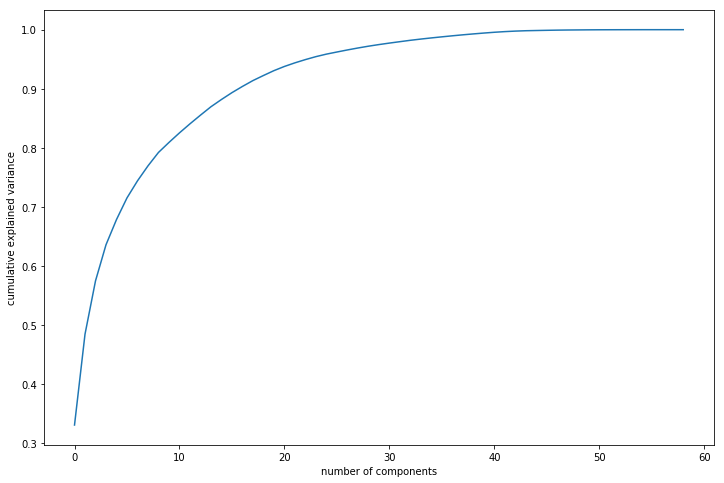

In [46]:
#90 percent at 17
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [47]:
pca = PCA(n_components=17,random_state=100)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)

Xtrain_reduced.shape

(7282, 17)

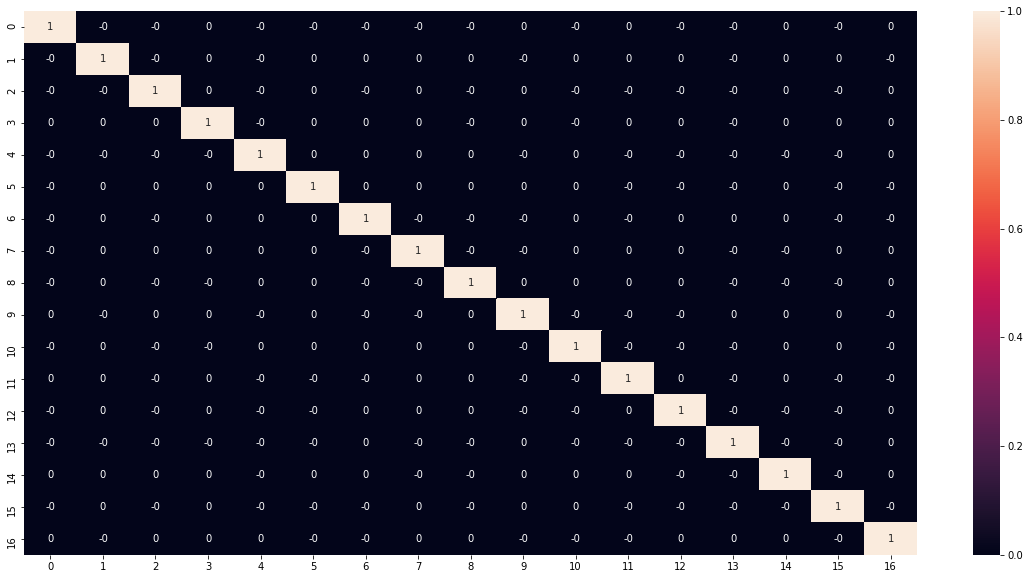

In [48]:
corrmat = np.corrcoef(Xtrain_reduced.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat.round(3),annot = True)

In [49]:
#training the regression model
#Training the model on the train data

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(Xtrain_reduced,y_train)

In [50]:
def prob_to_binary(a,b):
    if(a>b):
        return 1
    else:
        return 0

vfunc = np.vectorize(prob_to_binary)

In [51]:
#probabilily of 1 as target variable
y_train_predicted_probs=model_pca.predict_proba(Xtrain_reduced)[:,1]

In [52]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

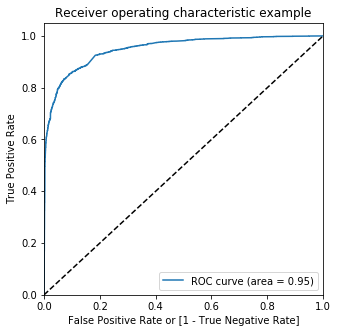

In [53]:
# roc curve
draw_roc(y_train, y_train_predicted_probs)

In [54]:
# Let's create columns with different probability cutoffs 
y_train_pred_final=np.zeros([y_train.shape[0],10],dtype=int)

numbers = [float(x)/10 for x in range(10)]
for i in range(10):
    y_train_pred_final[:,i]= vfunc(y_train_predicted_probs,numbers[i]).reshape((y_train.shape[0]))
y_train_pred_final

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [55]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
df_cutoff=[]
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(10):
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[:,i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.append([ i/10 ,accuracy,sensi,speci])
df_cutoff=np.array(df_cutoff)
df_cutoff

array([[0.        , 0.3787421 , 1.        , 0.        ],
       [0.1       , 0.73949464, 0.97461929, 0.59615385],
       [0.2       , 0.82765724, 0.94234953, 0.75773652],
       [0.3       , 0.87654491, 0.87273387, 0.87886826],
       [0.4       , 0.89041472, 0.83647571, 0.92329797],
       [0.5       , 0.89151332, 0.79840464, 0.94827586],
       [0.6       , 0.8825872 , 0.75235678, 0.96198055],
       [0.7       , 0.87352376, 0.70630892, 0.97546419],
       [0.8       , 0.85663279, 0.64358231, 0.98651636],
       [0.9       , 0.83919253, 0.58556925, 0.99381079]])

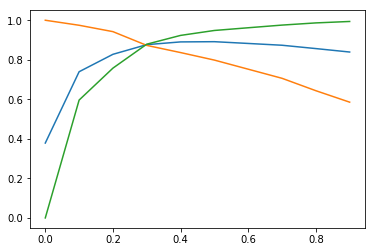

In [56]:
plt.plot(df_cutoff[:,0],df_cutoff[:,1:4])
plt.show()

In [57]:
#around 0.3 all metrices are good
y_train_predicted= vfunc(y_train_predicted_probs, 0.3)


In [58]:
#confusion matrix
metrics.confusion_matrix(y_train, y_train_predicted)

array([[3976,  548],
       [ 351, 2407]], dtype=int64)

In [59]:
#auc score
metrics.roc_auc_score(y_train, y_train_predicted)

0.8758010616491274

In [60]:
#accuracy
metrics.accuracy_score(y_train, y_train_predicted)

0.8765449052458116

# Testing

In [61]:
y_test_predicted_probs=model_pca.predict_proba(Xtest_reduced)[:,1]

In [62]:
y_test_predicted= vfunc(y_test_predicted_probs, 0.4)

In [63]:
confusion=metrics.confusion_matrix(y_test, y_test_predicted)
confusion

array([[1044,   74],
       [ 110,  593]], dtype=int64)

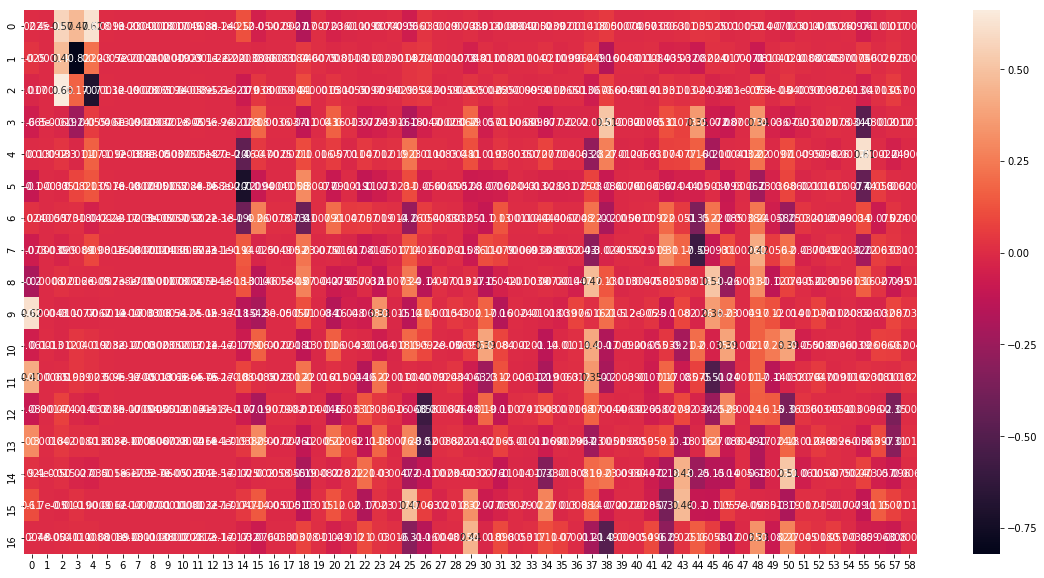

In [64]:
#values the coefficients of pca components corresponding each columns in dataset
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(pca.components_,annot = True)

In [65]:
p=X_train.columns
columnNames= pd.DataFrame({'columns':np.array(p)})
columnNames

,columns
0,Do Not Email
1,Do Not Call
2,TotalVisits
3,Total Time Spent on Website
4,Page Views Per Visit
5,Search
6,Magazine
7,Newspaper Article
8,X Education Forums
9,Newspaper


In [66]:
#coefficient of logistic regression model for the reduced columns 
model_pca.coef_

array([[ 0.46669755, -1.98750372,  1.27848937,  4.28349929,  1.57866807,
         0.24102797,  0.78251595,  1.08480304,  0.54200967, -2.38672636,
        -3.97607959,  0.95613232, -3.04280122,  2.15647368,  0.85173494,
        -2.06300318, -0.27796337]])

# Building the model (without using pca)


## Train test split and scaling of data

In [67]:
# splitting train and test data 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

In [68]:
# scaling the numerical columns

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\saurabh verma\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unsubscribed
9000,0,0,-0.298400,-0.771069,-0.164115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
6902,1,0,-0.502299,0.026359,-0.622557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7593,0,0,-0.706197,-0.881059,-1.080999,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1498,0,0,1.128891,-0.123961,0.981990,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,0,0,0.517195,1.041934,0.294327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7225
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 29 May 2019   Deviance:                          nan
Time:                        23:58:07   Pearson chi2:                 5.17e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.842e+14   1.88e+06   2.58e+08      0.000    4.84e+14    4.84e+14
Do Not Email                                         -1.315e+14   4.02e+06  -3.27e+07      0.000   -1.31e+14   -1.31e+14
Do Not Call                                            3.13e+15   4.76e+07   6.57e+07      0.000    3.13e+15    3.13e+15
TotalVisits                                           6.042e+13   9.61e+05   6.29e+07      0.000    6.04e+13    6.04e+13
Total Time Spent on Website                           3.977e+14   9.54e+05   4.17e+08      0.000    3.98e+14    3.98e+14
Page Views Per Visit                                 -4.639e+13    1.1e+06   -4.2e+07      0.000   -4.64e+13   -4.64e+13
Search                                               -1.082e+14    2.1e+07  -5.16e+06      0.000   -1.08e+14   -1.08e+14
Magazine                                                -1.2990   1.78e-07  -7.28e+06      0.000      -1.299      -1.299
Newspaper Article                                     3.633e+15   6.73e+07    5.4e+07      0.000    3.63e+15    3.63e+15
X Education Forums                                    -8.52e+15   1.08e+08  -7.92e+07      0.000   -8.52e+15   -8.52e+15
Newspaper                                            -4.668e+15   6.72e+07  -6.94e+07      0.000   -4.67e+15   -4.67e+15
Digital Advertisement                                 1.888e+14    3.9e+07   4.84e+06      0.000    1.89e+14    1.89e+14
Through Recommendations                               4.917e+14   2.84e+07   1.73e+07      0.000    4.92e+14    4.92e+14
Receive More Updates About Our Courses                 -10.6555    2.8e-07   -3.8e+07      0.000     -10.655     -10.655
I agree to pay the amount through cheque                12.7769   1.74e-07   7.33e+07      0.000      12.777      12.777
A free copy of Mastering The Interview               -1.109e+14   1.87e+06  -5.94e+07      0.000   -1.11e+14   -1.11e+14
Lead Origin_Lead Add Form                             7.284e+14   1.31e+07   5.54e+07      0.000    7.28e+14    7.28e+14
Lead Origin_Lead Import                              -2.433e+14    4.8e+07  -5.07e+06      0.000   -2.43e+14   -2.43e+14
Lead Source_Facebook                                 -2.727e+14   4.79e+07  -5.69e+06      0.000   -2.73e+14   -2.73e+14
Lead Source_Olark Chat                               -2.934e+14    2.9e+06  -1.01e+08      0.000   -2.93e+14   -2.93e+14
Lead Source_Referral Sites                           -1.882e+14   6.89e+06  -2.73e+07      0.000   -1.88e+14   -1.88e+14
Lead Source_Reference                                -7.589e+14   1.35e+07  -5.61e+07      0.000   -7.59e+14   -7.59e+14
Lead Source_Welingak Website                         -1.007e+14   1.46e+07  -6.92e+06      0.000   -1.01e+14   -1.01e+14
Last Activity_Co

In [70]:

logreg = LogisticRegression()

In [71]:
# Check for the RFE. 

rfe = RFE(logreg, 40)             # running RFE with 40  variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Search', True, 1),
 ('Magazine', False, 18),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 13),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 14),
 ('Receive More Updates About Our Courses', False, 19),
 ('I agree to pay the amount through cheque', False, 20),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activit

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Lead Source_Facebook', 'Lead Source_Referral Sites', 'Last Activity_Form Submitted on Website', 'Last Activity_Unsubscribed', 'Lead Quality_Low in Relevance', 'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation'], dtype='object')

In [76]:
#Extracting top 40 variables
X_train= X_train[col]


In [77]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.9
Date:                Wed, 29 May 2019   Deviance:                       2989.8
Time:                        23:59:18   Pearson chi2:                 7.96e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7721      0.085     -9.040      0.000      -0.940      -0.605
Total Time Spent on Website                              1.1386      0.056     20.153      0.000       1.028       1.249
Search                                                   0.7082      1.146      0.618      0.537      -1.538       2.955
Newspaper                                              -22.9889   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
A free copy of Mastering The Interview                  -0.3560      0.114     -3.114      0.002      -0.580      -0.132
Lead Origin_Lead Add Form                                2.9259      0.873      3.350      0.001       1.214       4.638
Lead Origin_Lead Import                                  0.5470      0.724      0.755      0.450      -0.873       1.967
Lead Source_Olark Chat                                   1.1583      0.141      8.237      0.000       0.883       1.434
Lead Source_Reference                                   -1.5544      0.965     -1.611      0.107      -3.446       0.337
Lead Source_Welingak Website                             2.9574      1.140      2.593      0.010       0.722       5.193
Last Activity_Converted to Lead                         -1.0666      0.341     -3.130      0.002      -1.734      -0.399
Last Activity_Email Bounced                             -1.7338      0.420     -4.128      0.000      -2.557      -0.911
Last Activity_Olark Chat Conversation                   -1.2027      0.277     -4.338      0.000      -1.746      -0.659
Last Activity_Page Visited on Website                   -0.8308      0.362     -2.297      0.022      -1.540      -0.122
Last Activity_Unreachable                               -0.4535      0.608     -0.746      0.456      -1.645       0.738
What is your current occupation_Working Professional     0.6916      0.347      1.994      0.046       0.012       1.371
Tags_Already a student                                  -4.0155      0.754     -5.325      0.000      -5.494      -2.538
Tags_Closed by Horizzon                                  5.8278      0.754      7.725      0.000       4.349       7.306
Tags_Diploma holder (Not Eligible)                      -3.0739      1.116     -2.756      0.006      -5.260      -0.887
Tags_Graduation in progress                             -0.8476      0.569     -1.489      0.137      -1.964       0.268
Tags_Interested in other courses                        -2.3268      0.349     -6.667      0.000      -3.011      -1.643
Tags_Lost to EINS                                        6.1790      0.654      9.451      0.000       4.898       7.460
Tags_Not doing further education                        -2.8248      1.035     -2.730      0.006      -4.852      -0.797
Tags_Ringing    

In [78]:
# dropping newspaper due to high z value
X_train=X_train.drop(['Newspaper'],axis=1)

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,18.27
6,Lead Source_Reference,14.29
7,Lead Source_Welingak Website,4.93
22,Tags_Will revert after reading the email,3.28
35,Last Notable Activity_Modified,2.76
11,Last Activity_Page Visited on Website,2.51
10,Last Activity_Olark Chat Conversation,2.29
37,Last Notable Activity_Page Visited on Website,2.27
27,Lead Quality_Might be,2.23
26,Lead Quality_High in Relevance,1.85


In [80]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1495.3
Date:                Wed, 29 May 2019   Deviance:                       2990.7
Time:                        23:59:22   Pearson chi2:                 7.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7721      0.085     -9.041      0.000      -0.939      -0.605
Total Time Spent on Website                              1.1368      0.056     20.142      0.000       1.026       1.247
Search                                                   0.7138      1.147      0.622      0.534      -1.534       2.961
A free copy of Mastering The Interview                  -0.3537      0.114     -3.095      0.002      -0.578      -0.130
Lead Origin_Lead Add Form                                2.9241      0.873      3.348      0.001       1.212       4.636
Lead Origin_Lead Import                                  0.5467      0.724      0.755      0.450      -0.873       1.967
Lead Source_Olark Chat                                   1.1569      0.141      8.229      0.000       0.881       1.433
Lead Source_Reference                                   -1.5536      0.965     -1.610      0.107      -3.445       0.338
Lead Source_Welingak Website                             2.9571      1.140      2.593      0.010       0.722       5.192
Last Activity_Converted to Lead                         -1.0663      0.341     -3.130      0.002      -1.734      -0.398
Last Activity_Email Bounced                             -1.7334      0.420     -4.128      0.000      -2.556      -0.910
Last Activity_Olark Chat Conversation                   -1.2030      0.277     -4.340      0.000      -1.746      -0.660
Last Activity_Page Visited on Website                   -0.8308      0.362     -2.297      0.022      -1.540      -0.122
Last Activity_Unreachable                               -0.4534      0.608     -0.746      0.456      -1.645       0.738
What is your current occupation_Working Professional     0.6909      0.347      1.993      0.046       0.011       1.371
Tags_Already a student                                  -4.0140      0.754     -5.323      0.000      -5.492      -2.536
Tags_Closed by Horizzon                                  5.8257      0.754      7.723      0.000       4.347       7.304
Tags_Diploma holder (Not Eligible)                      -3.0714      1.115     -2.754      0.006      -5.257      -0.885
Tags_Graduation in progress                             -0.8477      0.569     -1.489      0.136      -1.964       0.268
Tags_Interested in other courses                        -2.3251      0.349     -6.664      0.000      -3.009      -1.641
Tags_Lost to EINS                                        6.1766      0.654      9.449      0.000       4.895       7.458
Tags_Not doing further education                        -2.8240      1.035     -2.730      0.006      -4.852      -0.796
Tags_Ringing                                            -3.4643      0.244    -14.225      0.000      -3.942      -2.987
Tags_Will revert

In [81]:
# dropping variables based on high z value
X_train=X_train.drop(['Lead Profile_Lateral Student'],axis=1)

In [82]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.5
Date:                Wed, 29 May 2019   Deviance:                       3000.9
Time:                        23:59:23   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7653      0.085     -8.978      0.000      -0.932      -0.598
Total Time Spent on Website                              1.1322      0.056     20.121      0.000       1.022       1.242
Search                                                   0.7105      1.147      0.620      0.536      -1.537       2.958
A free copy of Mastering The Interview                  -0.3584      0.114     -3.143      0.002      -0.582      -0.135
Lead Origin_Lead Add Form                                2.9160      0.873      3.340      0.001       1.205       4.627
Lead Origin_Lead Import                                  0.5385      0.724      0.743      0.457      -0.881       1.958
Lead Source_Olark Chat                                   1.1459      0.140      8.167      0.000       0.871       1.421
Lead Source_Reference                                   -1.5464      0.965     -1.603      0.109      -3.437       0.344
Lead Source_Welingak Website                             2.9546      1.140      2.592      0.010       0.720       5.189
Last Activity_Converted to Lead                         -1.0699      0.341     -3.142      0.002      -1.737      -0.402
Last Activity_Email Bounced                             -1.7342      0.420     -4.130      0.000      -2.557      -0.911
Last Activity_Olark Chat Conversation                   -1.2036      0.277     -4.344      0.000      -1.747      -0.661
Last Activity_Page Visited on Website                   -0.8360      0.362     -2.312      0.021      -1.545      -0.127
Last Activity_Unreachable                               -0.4561      0.608     -0.750      0.453      -1.647       0.735
What is your current occupation_Working Professional     0.6889      0.346      1.992      0.046       0.011       1.367
Tags_Already a student                                  -3.5450      0.630     -5.628      0.000      -4.780      -2.310
Tags_Closed by Horizzon                                  5.8543      0.755      7.755      0.000       4.375       7.334
Tags_Diploma holder (Not Eligible)                      -3.0606      1.115     -2.745      0.006      -5.246      -0.875
Tags_Graduation in progress                             -0.8352      0.569     -1.469      0.142      -1.950       0.279
Tags_Interested in other courses                        -2.3172      0.349     -6.647      0.000      -3.000      -1.634
Tags_Lost to EINS                                        6.1896      0.655      9.450      0.000       4.906       7.473
Tags_Not doing further education                        -2.8127      1.034     -2.719      0.007      -4.840      -0.785
Tags_Ringing                                            -3.4560      0.243    -14.213      0.000      -3.933      -2.979
Tags_Will revert

In [83]:

# dropping variables based on high z value
X_train=X_train.drop(['Search'],axis=1)


In [84]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.6
Date:                Wed, 29 May 2019   Deviance:                       3001.2
Time:                        23:59:24   Pearson chi2:                 8.06e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7641      0.085     -8.969      0.000      -0.931      -0.597
Total Time Spent on Website                              1.1320      0.056     20.121      0.000       1.022       1.242
A free copy of Mastering The Interview                  -0.3594      0.114     -3.151      0.002      -0.583      -0.136
Lead Origin_Lead Add Form                                2.9145      0.873      3.339      0.001       1.204       4.625
Lead Origin_Lead Import                                  0.5371      0.724      0.742      0.458      -0.882       1.956
Lead Source_Olark Chat                                   1.1444      0.140      8.160      0.000       0.870       1.419
Lead Source_Reference                                   -1.5461      0.965     -1.603      0.109      -3.437       0.344
Lead Source_Welingak Website                             2.9543      1.140      2.591      0.010       0.720       5.189
Last Activity_Converted to Lead                         -1.0711      0.340     -3.146      0.002      -1.738      -0.404
Last Activity_Email Bounced                             -1.7348      0.420     -4.132      0.000      -2.558      -0.912
Last Activity_Olark Chat Conversation                   -1.2043      0.277     -4.347      0.000      -1.747      -0.661
Last Activity_Page Visited on Website                   -0.8313      0.362     -2.297      0.022      -1.541      -0.122
Last Activity_Unreachable                               -0.4566      0.608     -0.752      0.452      -1.647       0.734
What is your current occupation_Working Professional     0.6881      0.346      1.990      0.047       0.010       1.366
Tags_Already a student                                  -3.5447      0.630     -5.628      0.000      -4.779      -2.310
Tags_Closed by Horizzon                                  5.8523      0.755      7.753      0.000       4.373       7.332
Tags_Diploma holder (Not Eligible)                      -3.0609      1.115     -2.746      0.006      -5.246      -0.876
Tags_Graduation in progress                             -0.8351      0.569     -1.469      0.142      -1.950       0.279
Tags_Interested in other courses                        -2.3174      0.349     -6.649      0.000      -3.001      -1.634
Tags_Lost to EINS                                        6.1886      0.655      9.448      0.000       4.905       7.472
Tags_Not doing further education                        -2.8144      1.034     -2.721      0.007      -4.842      -0.787
Tags_Ringing                                            -3.4479      0.243    -14.212      0.000      -3.923      -2.972
Tags_Will revert after reading the email                 3.9639      0.229     17.340      0.000       3.516       4.412
Tags_invalid num

In [85]:

# dropping variables based on high z value
X_train=X_train.drop(['Last Activity_Unreachable'],axis=1)


In [86]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.9
Date:                Wed, 29 May 2019   Deviance:                       3001.8
Time:                        23:59:26   Pearson chi2:                 8.06e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7675      0.085     -9.018      0.000      -0.934      -0.601
Total Time Spent on Website                              1.1327      0.056     20.133      0.000       1.022       1.243
A free copy of Mastering The Interview                  -0.3591      0.114     -3.150      0.002      -0.583      -0.136
Lead Origin_Lead Add Form                                2.9200      0.873      3.345      0.001       1.209       4.631
Lead Origin_Lead Import                                  0.5427      0.724      0.750      0.453      -0.876       1.961
Lead Source_Olark Chat                                   1.1463      0.140      8.174      0.000       0.871       1.421
Lead Source_Reference                                   -1.5464      0.965     -1.603      0.109      -3.437       0.344
Lead Source_Welingak Website                             2.9546      1.140      2.591      0.010       0.720       5.190
Last Activity_Converted to Lead                         -1.0629      0.340     -3.125      0.002      -1.730      -0.396
Last Activity_Email Bounced                             -1.7293      0.420     -4.120      0.000      -2.552      -0.907
Last Activity_Olark Chat Conversation                   -1.1976      0.277     -4.326      0.000      -1.740      -0.655
Last Activity_Page Visited on Website                   -0.8229      0.362     -2.276      0.023      -1.532      -0.114
What is your current occupation_Working Professional     0.6912      0.346      1.999      0.046       0.013       1.369
Tags_Already a student                                  -3.5431      0.630     -5.625      0.000      -4.778      -2.308
Tags_Closed by Horizzon                                  5.8522      0.755      7.752      0.000       4.373       7.332
Tags_Diploma holder (Not Eligible)                      -3.0576      1.115     -2.742      0.006      -5.243      -0.872
Tags_Graduation in progress                             -0.8296      0.568     -1.459      0.144      -1.944       0.285
Tags_Interested in other courses                        -2.3153      0.349     -6.643      0.000      -2.998      -1.632
Tags_Lost to EINS                                        6.1911      0.655      9.451      0.000       4.907       7.475
Tags_Not doing further education                        -2.8126      1.034     -2.719      0.007      -4.840      -0.785
Tags_Ringing                                            -3.4470      0.243    -14.211      0.000      -3.922      -2.972
Tags_Will revert after reading the email                 3.9599      0.228     17.338      0.000       3.512       4.408
Tags_invalid number                                     -3.0048      1.025     -2.930      0.003      -5.015      -0.995
Tags_opp hangup 

In [87]:

# dropping variables based on high z value
X_train=X_train.drop(['Lead Origin_Lead Import'],axis=1)

In [88]:

X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.2
Date:                Wed, 29 May 2019   Deviance:                       3002.4
Time:                        23:59:27   Pearson chi2:                 8.07e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7616      0.085     -8.994      0.000      -0.928      -0.596
Total Time Spent on Website                              1.1290      0.056     20.160      0.000       1.019       1.239
A free copy of Mastering The Interview                  -0.3635      0.114     -3.193      0.001      -0.587      -0.140
Lead Origin_Lead Add Form                                2.9086      0.873      3.333      0.001       1.198       4.619
Lead Source_Olark Chat                                   1.1378      0.140      8.146      0.000       0.864       1.412
Lead Source_Reference                                   -1.5457      0.965     -1.603      0.109      -3.436       0.345
Lead Source_Welingak Website                             2.9566      1.140      2.593      0.010       0.722       5.191
Last Activity_Converted to Lead                         -1.0674      0.340     -3.139      0.002      -1.734      -0.401
Last Activity_Email Bounced                             -1.7317      0.420     -4.127      0.000      -2.554      -0.909
Last Activity_Olark Chat Conversation                   -1.2006      0.277     -4.337      0.000      -1.743      -0.658
Last Activity_Page Visited on Website                   -0.8273      0.362     -2.289      0.022      -1.536      -0.119
What is your current occupation_Working Professional     0.6902      0.346      1.997      0.046       0.013       1.367
Tags_Already a student                                  -3.5433      0.630     -5.627      0.000      -4.777      -2.309
Tags_Closed by Horizzon                                  5.8448      0.755      7.743      0.000       4.365       7.324
Tags_Diploma holder (Not Eligible)                      -3.0599      1.115     -2.744      0.006      -5.246      -0.874
Tags_Graduation in progress                             -0.8343      0.569     -1.467      0.142      -1.949       0.280
Tags_Interested in other courses                        -2.3174      0.348     -6.651      0.000      -3.000      -1.634
Tags_Lost to EINS                                        6.1882      0.655      9.447      0.000       4.904       7.472
Tags_Not doing further education                        -2.8148      1.034     -2.722      0.006      -4.842      -0.788
Tags_Ringing                                            -3.4474      0.243    -14.210      0.000      -3.923      -2.972
Tags_Will revert after reading the email                 3.9588      0.228     17.328      0.000       3.511       4.407
Tags_invalid number                                     -3.0078      1.025     -2.933      0.003      -5.018      -0.998
Tags_opp hangup                                         -1.8497      0.774     -2.389      0.017      -3.367      -0.332
Tags_switched of

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,18.26
4,Lead Source_Reference,14.29
5,Lead Source_Welingak Website,4.93
19,Tags_Will revert after reading the email,3.27
31,Last Notable Activity_Modified,2.70
9,Last Activity_Page Visited on Website,2.49
8,Last Activity_Olark Chat Conversation,2.28
33,Last Notable Activity_Page Visited on Website,2.27
24,Lead Quality_Might be,2.22
23,Lead Quality_High in Relevance,1.84


In [90]:
# dropping variable based on high vif value
X_train=X_train.drop(['Lead Origin_Lead Add Form'],axis=1)

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Tags_Will revert after reading the email,3.25
30,Last Notable Activity_Modified,2.70
8,Last Activity_Page Visited on Website,2.49
7,Last Activity_Olark Chat Conversation,2.28
32,Last Notable Activity_Page Visited on Website,2.27
23,Lead Quality_Might be,2.22
22,Lead Quality_High in Relevance,1.84
26,Lead Profile_Potential Lead,1.82
25,Lead Quality_Worst,1.80
2,Lead Source_Olark Chat,1.72


In [92]:

X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7247
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.3
Date:                Wed, 29 May 2019   Deviance:                       3016.6
Time:                        23:59:32   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7314      0.084     -8.716      0.000      -0.896      -0.567
Total Time Spent on Website                              1.1143      0.056     20.016      0.000       1.005       1.223
A free copy of Mastering The Interview                  -0.3840      0.113     -3.385      0.001      -0.606      -0.162
Lead Source_Olark Chat                                   1.1042      0.139      7.955      0.000       0.832       1.376
Lead Source_Reference                                    1.3097      0.435      3.007      0.003       0.456       2.163
Lead Source_Welingak Website                             5.8226      0.748      7.785      0.000       4.357       7.289
Last Activity_Converted to Lead                         -1.0864      0.340     -3.194      0.001      -1.753      -0.420
Last Activity_Email Bounced                             -1.7437      0.419     -4.158      0.000      -2.566      -0.922
Last Activity_Olark Chat Conversation                   -1.2137      0.277     -4.385      0.000      -1.756      -0.671
Last Activity_Page Visited on Website                   -0.8448      0.362     -2.337      0.019      -1.553      -0.136
What is your current occupation_Working Professional     0.6759      0.345      1.958      0.050      -0.001       1.352
Tags_Already a student                                  -3.5456      0.629     -5.636      0.000      -4.779      -2.313
Tags_Closed by Horizzon                                  5.8059      0.754      7.696      0.000       4.327       7.285
Tags_Diploma holder (Not Eligible)                      -3.0782      1.117     -2.756      0.006      -5.267      -0.889
Tags_Graduation in progress                             -0.8636      0.571     -1.513      0.130      -1.982       0.255
Tags_Interested in other courses                        -2.3260      0.348     -6.687      0.000      -3.008      -1.644
Tags_Lost to EINS                                        6.1968      0.654      9.481      0.000       4.916       7.478
Tags_Not doing further education                        -2.8232      1.034     -2.731      0.006      -4.849      -0.797
Tags_Ringing                                            -3.4523      0.242    -14.253      0.000      -3.927      -2.978
Tags_Will revert after reading the email                 3.9581      0.228     17.390      0.000       3.512       4.404
Tags_invalid number                                     -3.0192      1.025     -2.945      0.003      -5.028      -1.010
Tags_opp hangup                                         -1.8554      0.773     -2.400      0.016      -3.371      -0.340
Tags_switched off                                       -3.9822      0.615     -6.472      0.000      -5.188      -2.776
Lead Quality_Hig

In [93]:
# dropping variables with high z value
X_train=X_train.drop(['Last Notable Activity_Page Visited on Website','Last Notable Activity_Unsubscribed'],axis=1)

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Tags_Will revert after reading the email,3.24
30,Last Notable Activity_Modified,2.39
23,Lead Quality_Might be,2.22
7,Last Activity_Olark Chat Conversation,2.21
22,Lead Quality_High in Relevance,1.84
26,Lead Profile_Potential Lead,1.82
25,Lead Quality_Worst,1.80
2,Lead Source_Olark Chat,1.71
10,Tags_Already a student,1.66
11,Tags_Closed by Horizzon,1.57


In [95]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7249
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.9
Date:                Wed, 29 May 2019   Deviance:                       3017.9
Time:                        23:59:35   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7426      0.083     -8.914      0.000      -0.906      -0.579
Total Time Spent on Website                              1.1141      0.056     20.018      0.000       1.005       1.223
A free copy of Mastering The Interview                  -0.3821      0.113     -3.370      0.001      -0.604      -0.160
Lead Source_Olark Chat                                   1.1045      0.139      7.962      0.000       0.833       1.376
Lead Source_Reference                                    1.3111      0.436      3.005      0.003       0.456       2.166
Lead Source_Welingak Website                             5.8202      0.747      7.788      0.000       4.355       7.285
Last Activity_Converted to Lead                         -1.1149      0.338     -3.299      0.001      -1.777      -0.453
Last Activity_Email Bounced                             -1.7549      0.419     -4.186      0.000      -2.577      -0.933
Last Activity_Olark Chat Conversation                   -1.2408      0.274     -4.524      0.000      -1.778      -0.703
Last Activity_Page Visited on Website                   -1.0451      0.221     -4.723      0.000      -1.479      -0.611
What is your current occupation_Working Professional     0.6741      0.345      1.953      0.051      -0.003       1.351
Tags_Already a student                                  -3.5375      0.629     -5.626      0.000      -4.770      -2.305
Tags_Closed by Horizzon                                  5.8183      0.755      7.702      0.000       4.338       7.299
Tags_Diploma holder (Not Eligible)                      -3.0711      1.115     -2.753      0.006      -5.257      -0.885
Tags_Graduation in progress                             -0.8531      0.571     -1.495      0.135      -1.972       0.266
Tags_Interested in other courses                        -2.3233      0.348     -6.682      0.000      -3.005      -1.642
Tags_Lost to EINS                                        6.1999      0.654      9.473      0.000       4.917       7.483
Tags_Not doing further education                        -2.8489      1.033     -2.757      0.006      -4.874      -0.824
Tags_Ringing                                            -3.4456      0.242    -14.243      0.000      -3.920      -2.971
Tags_Will revert after reading the email                 3.9780      0.227     17.555      0.000       3.534       4.422
Tags_invalid number                                     -3.0391      1.024     -2.967      0.003      -5.047      -1.032
Tags_opp hangup                                         -1.8480      0.773     -2.390      0.017      -3.363      -0.333
Tags_switched off                                       -3.9779      0.615     -6.465      0.000      -5.184      -2.772
Lead Quality_Hig

In [96]:
def prob_to_binary(a,b):
    if(a>b):
        return 1
    else:
        return 0

vfunc = np.vectorize(prob_to_binary)

In [97]:
#probabilily of target variable
y_train_predicted_probs=res.predict(X_train_sm).values.reshape(-1)

# Finding cutoff

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

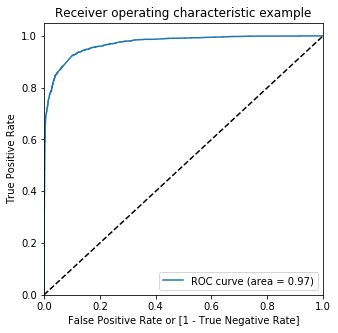

In [99]:
# roc curve
draw_roc(y_train, y_train_predicted_probs)

In [100]:
y_train_predicted_probs.shape


(7282,)

In [101]:
X_train.shape

(7282, 32)

In [102]:
# Let's create columns with different probability cutoffs 
y_train_pred_final=np.zeros([y_train.shape[0],10],dtype=int)

numbers = [float(x)/10 for x in range(10)]
for i in range(10):
    y_train_pred_final[:,i]= vfunc(y_train_predicted_probs,numbers[i]).reshape((y_train.shape[0]))
y_train_pred_final

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
df_cutoff=[]
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(10):
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[:,i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.append([ i/10 ,accuracy,sensi,speci])
df_cutoff=np.array(df_cutoff)
df_cutoff

array([[0.        , 0.3787421 , 1.        , 0.        ],
       [0.1       , 0.82120297, 0.97715736, 0.72612732],
       [0.2       , 0.88107663, 0.95032632, 0.83885942],
       [0.3       , 0.90497116, 0.92820885, 0.8908046 ],
       [0.4       , 0.91444658, 0.87055838, 0.94120248],
       [0.5       , 0.91581983, 0.84118927, 0.96131742],
       [0.6       , 0.90964021, 0.81327049, 0.9683908 ],
       [0.7       , 0.90332326, 0.7835388 , 0.97634836],
       [0.8       , 0.89329854, 0.74147933, 0.98585323],
       [0.9       , 0.8836858 , 0.70775925, 0.99093722]])

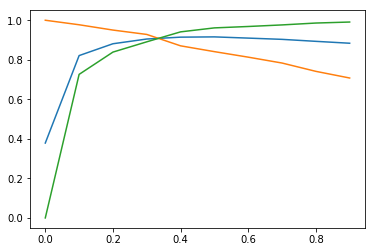

In [104]:
plt.plot(df_cutoff[:,0],df_cutoff[:,1:4])
plt.show()

In [105]:
#around 0.4 all metrices are good
y_train_predicted= vfunc(y_train_predicted_probs, 0.4)


In [106]:
#confusion matrix
metrics.confusion_matrix(y_train, y_train_predicted)


array([[4258,  266],
       [ 357, 2401]], dtype=int64)

In [107]:
#auc score
metrics.roc_auc_score(y_train, y_train_predicted)

0.9058804256598759

In [108]:
#accuracy
metrics.accuracy_score(y_train, y_train_predicted)

0.9144465806097226

# Testing

In [109]:
X_train.columns

Index(['Total Time Spent on Website', 'A free copy of Mastering The Interview', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'What is your current occupation_Working Professional', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_opp hangup', 'Tags_switched off', 'Lead Quality_High in Relevance', 'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Lead Profile_Potential Lead', 'Asymmetrique Activity Index_01.High', 'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Modified',
   

In [110]:
# selecting column used in training data
X_test_sm = sm.add_constant(X_test[X_train.columns])
y_test_predicted_probs=res.predict(X_test_sm).values.reshape(-1)

In [111]:
y_test_predicted= vfunc(y_test_predicted_probs, 0.4)

In [112]:
# confusion matrix for test data set
confusion=metrics.confusion_matrix(y_test, y_test_predicted)
confusion

array([[1046,   72],
       [  95,  608]], dtype=int64)

In [113]:
#auc score or testing
metrics.roc_auc_score(y_test, y_test_predicted)

0.9002320746506793

In [114]:
#accuracy for testing
metrics.accuracy_score(y_test, y_test_predicted)

0.9082921471718836

# Conclusion



Model with pca has auc score of 87 percent which is quite good.It uses 17 reduced columns for training model. Model built using rfe and vif only has higher auc score(90 percent) but uses 32 columns for training.
Although model with pca is simpler but making inferences is tougher as there are too many weights corresponding each component.
So model with rfe and vif support is better for this dataset.




## Analysis

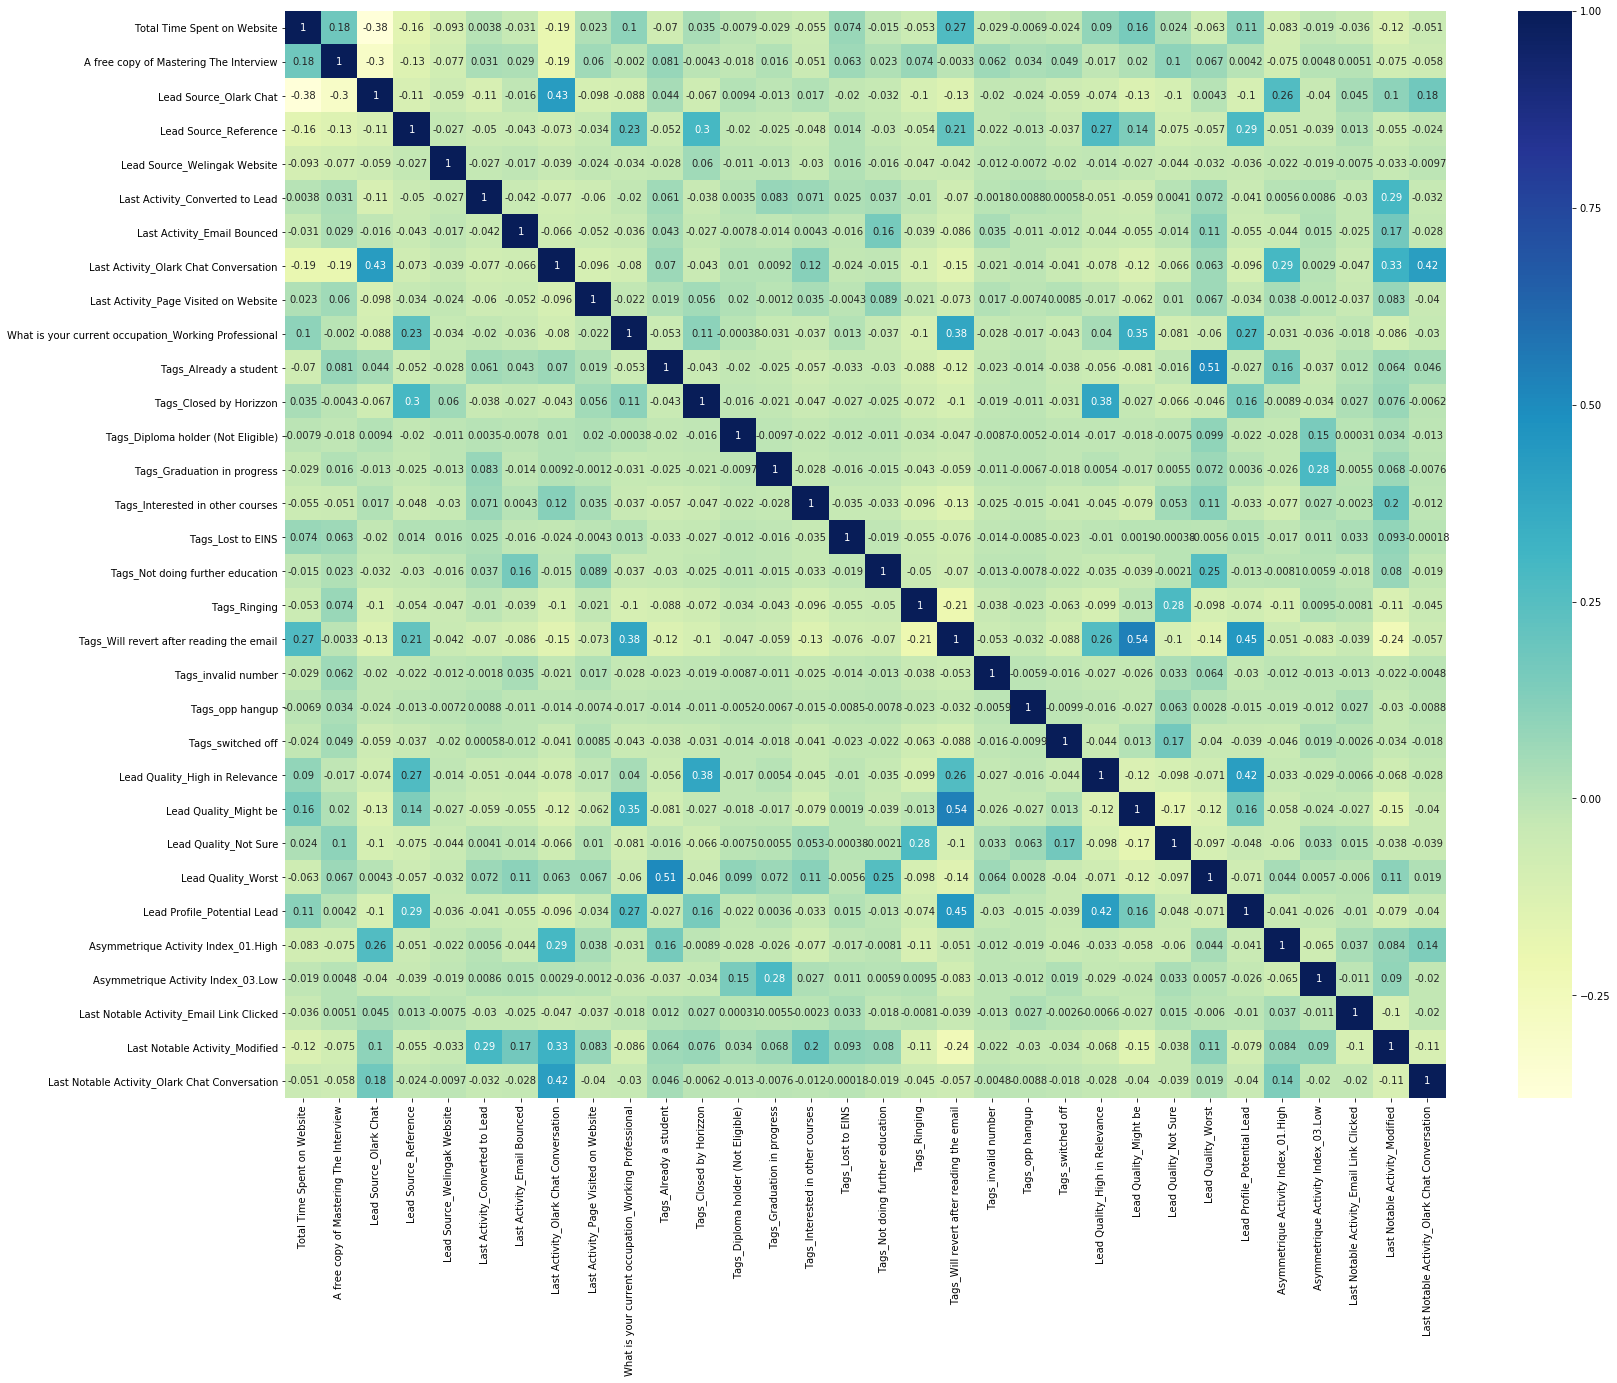

In [115]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(X_train[X_train.columns].corr(), annot = True, cmap="YlGnBu")
plt.show()